In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import imshow

torch.manual_seed(42);

In [2]:
class DatasetWrapper(Dataset):
    def __init__(self, dataset, transform):
        self.dataset = dataset
        self.transform = transform
        
    def __getitem__(self, index):
        image, label = self.dataset[index]
        return self.transform(image), label
        
    def __len__(self):
        return len(self.dataset)

In [5]:
torch.manual_seed(42)

train_transform = transforms.Compose(
    [
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomAffine((-10, 10)),
        transforms.RandomResizedCrop(32, scale=(0.65, 1.0)),
        transforms.ToTensor(),
        transforms.RandomErasing(p=0.2, scale=(0.02, 0.04))
    ]
)

# not applying any transformations to validation dataset
valid_transform = transforms.ToTensor()

# Built-in dataset (the same as Kaggle)
dataset = torchvision.datasets.CIFAR10(root='../data', train=True, 
                                       download=True)

train_size = int(0.8 * len(dataset))  # 40_000
valid_size = len(dataset) - train_size  # 10_000

trainset_raw, validset_raw = torch.utils.data.random_split(dataset, [train_size, valid_size])
trainset = DatasetWrapper(trainset_raw, train_transform)
validset = DatasetWrapper(validset_raw, valid_transform)

# Trainloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=40,
                                          shuffle=True, num_workers=2)

validloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


#### Data is augmented in random ways

frog


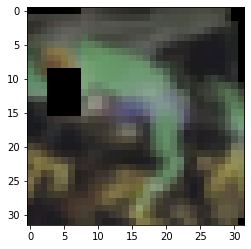

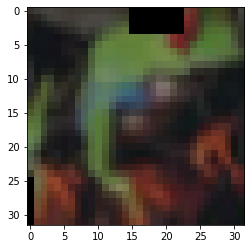

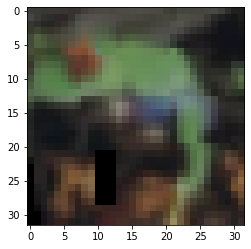

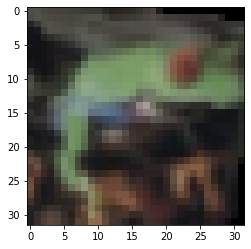

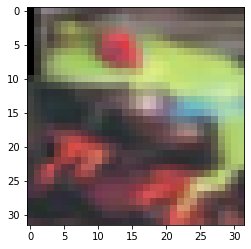

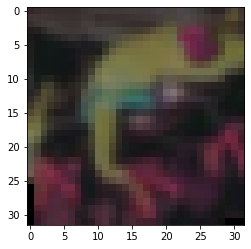

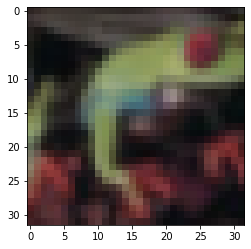

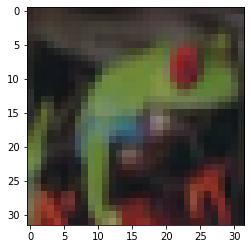

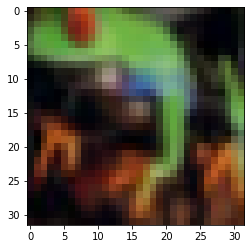

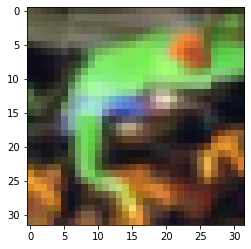

In [6]:
idx = 0
print(classes[trainset[idx][1]])
for _ in range(10):
    imshow(trainset[idx][0])

---
#### Usage of get_loader_splits() function

In [ ]:
from data import get_loader_splits
trainloader, validloader = get_loader_splits(augment=True)

In [ ]:
next(iter(trainloader))[0].shape